In [1]:
import numpy as np

from GmGM import GmGM
from GmGM.synthetic import PrecMatGenerator, DatasetGenerator
from GmGM.synthetic import PrecMatErdosRenyiGilbert
from GmGM.synthetic import measure_prec_recall, plot_prec_recall

In [2]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
    },
    size={
        "cell": 51,
        "gene": 52,
        "peak": 53
    },
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 51
	gene: 52
	peak: 53
generator=
	cell: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	gene: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	peak: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Normal Distribution>
	atac: <Normal Distribution>
>

In [3]:
generator.generate()

Dataset(
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
)
Axes(
	peak: 53
		Prior: None
		Gram: Not calculated
		Eig: Not calculated
	cell: 51
		Prior: None
		Gram: Not calculated
		Eig: Not calculated
	gene: 52
		Prior: None
		Gram: Not calculated
		Eig: Not calculated
)

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


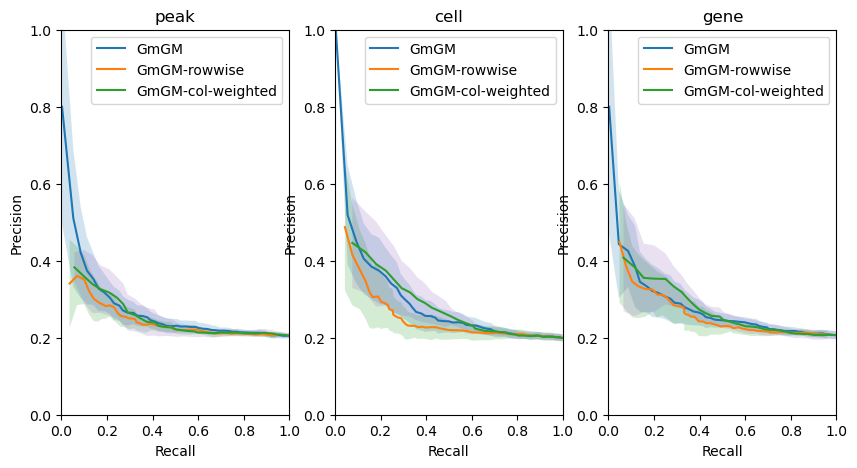

In [4]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

We can also generate log-normal data:

In [12]:
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
    },
    size={
        "cell": 51,
        "gene": 52,
        "peak": 53
    },
    distribution="Log Normal"
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 51
	gene: 52
	peak: 53
generator=
	cell: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	gene: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	peak: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
axis_join=
	Kronecker Sum
distribution=
	rna: <Log Normal Distribution>
	atac: <Log Normal Distribution>
>

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


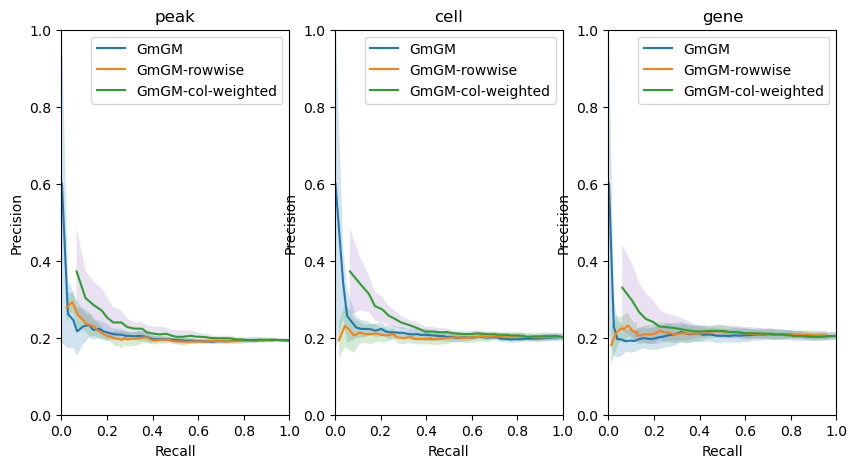

In [14]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

And zero-inflated log-normal data

In [7]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.2),
        ),
    },
    size={
        "cell": 51,
        "gene": 52,
        "peak": 53
    },
    distribution={
        "rna": ZiLNDistribution(np.exp(np.random.random(52).reshape(1, 52))),
        "atac": ZiLNDistribution(np.exp(np.random.random(53).reshape(1, 53))),
    }
)
generator

<DatasetGenerator, structure=
	rna: ('', 'cell', 'gene')
	atac: ('', 'cell', 'peak')
size=
	cell: 51
	gene: 52
	peak: 53
generator=
	cell: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	gene: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
	peak: <PrecMatGenerator, core=invwishart, mask=PrecMatErdosRenyiGilbert(edge_probability=0.2)>
axis_join=
	Kronecker Sum
distribution=
	rna: <ZiLN Distribution, truncation=[[2.67015341 2.31319853 1.79269967 2.34935034 1.29779785 1.62106166
  1.46238627 2.61710524 1.71061226 1.16808921 2.64053772 1.21848279
  2.1452081  1.14215445 2.20068077 1.55478684 1.05753607 2.3490489
  1.5747857  1.24390905 1.17933143 1.49899111 1.11256708 1.89997636
  2.16154097 1.19925146 1.20580695 2.14545258 1.68970902 2.504071
  1.52531669 2.0069447  1.50176449 1.87384602 2.30813419 1.90289564
  2.40803762 2.58289793 1.12063398 1.58305031 2.02238495 2.03326021
  1.09115061 1.27741374 1.6518

In [8]:
(generator.generate().dataset["rna"] > 0).sum() / (51 * 52)

0.06259426847662142

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


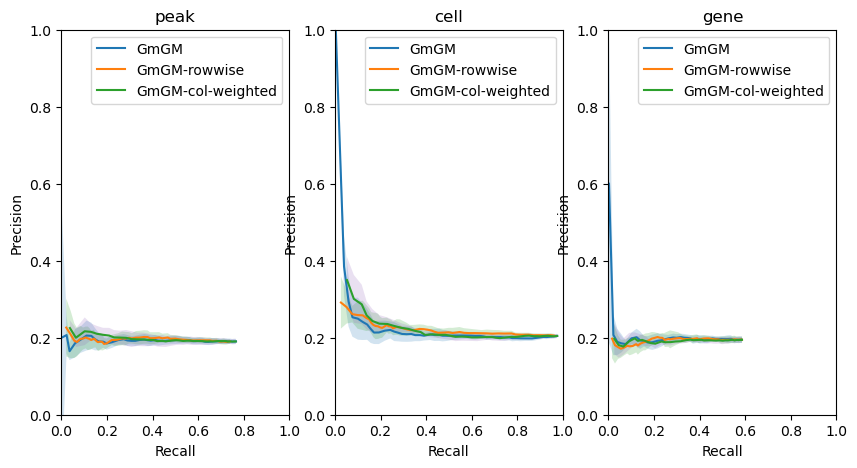

In [9]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=10,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass

What about larger datasets?

In [10]:
from GmGM.synthetic import ZiLNDistribution
generator = DatasetGenerator(
    structure={
        "rna": ("cell", "gene"),
        "atac": ("cell", "peak"),
    },
    generator={
        "cell": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "gene": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
        "peak": PrecMatGenerator(
            mask=PrecMatErdosRenyiGilbert(edge_probability=0.02),
        ),
    },
    size={
        "cell": 501,
        "gene": 502,
        "peak": 503
    },
    distribution={
        "rna": ZiLNDistribution(np.random.random(502).reshape(1, 502)),
        "atac": ZiLNDistribution(np.random.random(503).reshape(1, 503)),
    }
)
generator
1/0

ZeroDivisionError: division by zero

Attempt 1/5
Attempt 2/5
Attempt 3/5
Attempt 4/5
Attempt 5/5


(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='Recall', ylabel='Precision'>)

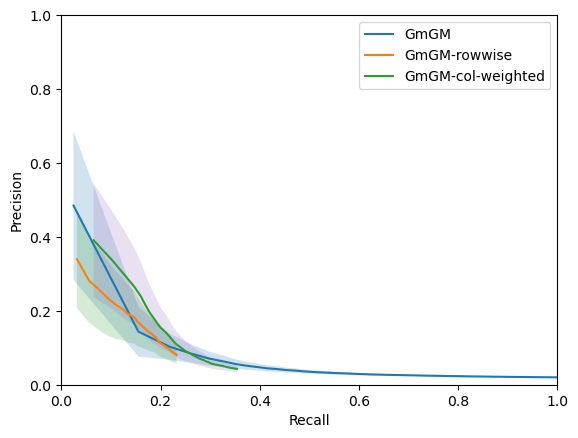

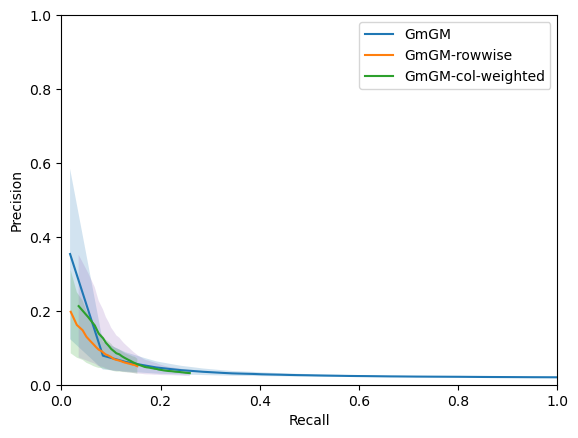

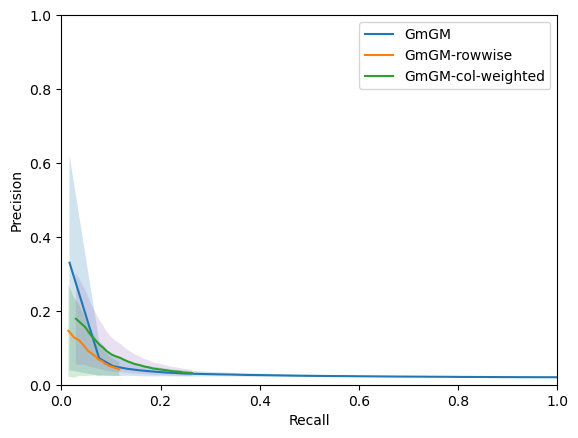

In [ ]:
results = measure_prec_recall(
    generator,
    algorithms={
        "GmGM": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="overall"),
        "GmGM-rowwise": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise"),
        "GmGM-col-weighted": lambda dataset, lambdas: GmGM(dataset, lambdas, threshold_method="rowwise-col-weighted")
    },
    Lambdas={
        "GmGM": np.linspace(0.001, 1, 50),
        "GmGM-rowwise": np.arange(1, 51),
        "GmGM-col-weighted": np.arange(1, 51)
    },
    num_attempts=5,
    num_samples=1,
    verbose=1,
)
plot_prec_recall(results, figsize=(10, 5))
pass